In [3]:
import anndata as ad
import scanpy as sc

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import torch

from persist import PERSIST, ExpressionDataset

In [4]:
adata = ad.read_h5ad('/scratch/nmq407/exp_all_n1xo')
adata

AnnData object with n_obs × n_vars = 27188 × 25074
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'cell_class', 'polar_label', 'nCount_integrated', 'nFeature_integrated', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [10]:
print(adata.X[:10, :10])

  (1, 1)	1.0
  (8, 1)	1.0
  (0, 2)	1.0
  (2, 2)	2.0
  (3, 2)	3.0
  (4, 2)	1.0
  (0, 3)	1.0
  (1, 3)	6.0
  (2, 3)	3.0
  (3, 3)	4.0
  (4, 3)	4.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (0, 5)	2.0
  (1, 5)	4.0
  (2, 5)	2.0
  (4, 5)	2.0
  (5, 5)	4.0
  (6, 5)	1.0
  (7, 5)	2.0
  (8, 5)	2.0
  (9, 5)	1.0
  (0, 7)	3.0
  (1, 7)	1.0
  (0, 8)	2.0
  (1, 8)	5.0
  (2, 8)	1.0
  (3, 8)	1.0
  (5, 8)	4.0
  (7, 8)	4.0
  (8, 8)	1.0


In [11]:
adata.var

Empty DataFrame
Columns: []
Index: [ENSMUSG00000089699, Lypla1, Tcea1, Atp6v1h, Oprk1, Rb1cc1, Alkal1, St18, Pcmtd1, ENSMUSG00000103067, Rrs1, Adhfe1, Vxn, ENSMUSG00000097893, Sgk3, Mcmdc2, Cspp1, Prex2, A830018L16Rik, Gm17644, Sulf1, ENSMUSG00000099498, ENSMUSG00000101476, Xkr9, ENSMUSG00000054493, Kcnb2, Terf1, Rdh10, ENSMUSG00000100868, D030040B21Rik, Tmem70, Ly96, ENSMUSG00000101640, ENSMUSG00000100110, Gdap1, ENSMUSG00000099899, Pi15, Crispld1, Tfap2d, Tfap2b, Lincmd1, ENSMUSG00000102121, Paqr8, Efhc1, ENSMUSG00000099971, Tmem14a, Gsta3, Khdc1c, Khdc1b, ENSMUSG00000097970, ENSMUSG00000100775, Gm28822, B3gat2, Col9a1, Lmbrd1, Gm5524, Khdrbs2, Rab23, Dst, Imp4, Ptpn18, Cfc1, Amer3, Arhgef4, Plekhb2, ENSMUSG00000101714, ENSMUSG00000102531, Hs6st1, ENSMUSG00000102202, Arid5a, ENSMUSG00000102762, Fer1l5, Cnnm4, Cnnm3, ENSMUSG00000087589, Cox5b, 4933424G06Rik, Zap70, Vwa3b, Cnga3, Inpp4a, Unc50, ENSMUSG00000097268, Lipt1, Mrpl30, ENSMUSG00000087374, Eif5b, Gm5099, ENSMUSG00000087131, Nms, Pdcl3, Npas2, Rpl31, Cnot11, ENSMUSG00000097083, Map4k4, Il1r2, Il1r1, Il1rl2, Il1rl1, ...]

[25074 rows x 0 columns]

In [25]:
adata[:,]

View of AnnData object with n_obs × n_vars = 27188 × 25074
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'cell_class', 'polar_label', 'nCount_integrated', 'nFeature_integrated', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [26]:
sc.pp.highly_variable_genes(adata, layer='logcounts', flavor='seurat', n_top_genes=10000, inplace=True)

In [27]:
adata

AnnData object with n_obs × n_vars = 27188 × 25074
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'cell_class', 'polar_label', 'nCount_integrated', 'nFeature_integrated', 'ident'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'hvg'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [28]:
adata.var['highly_variable']

ENSMUSG00000089699     True
Lypla1                 True
Tcea1                 False
Atp6v1h               False
Oprk1                  True
                      ...  
ENSMUSG00000061654    False
ENSMUSG00000095552    False
ENSMUSG00000095742     True
ENSMUSG00000095041     True
ENSMUSG00000100896     True
Name: highly_variable, Length: 25074, dtype: bool

In [29]:
adata = adata[:,adata.var['highly_variable']]

In [30]:
adata.obs['polar_label']

TTCTAGTGTTAACCTG_3_3_1                    Nr5a1_Bdnf.none
AAGCCATCACTGGACC_1_3_1                         Gpr50.none
TAGGTACAGACCGTTT_1_3_1                    Nr5a1_Bdnf.none
TTCGATTGTGGCTAGA_2_3_1              Unassigned1.sc39.none
ATTCATCCATACAGAA_1_2_1         Unassigned1.sc17.sc28.none
                                       ...               
CCTTTGGCAGAGTAAT_5_3_2            a1_Tany__Astrocytes.neg
ACTTTCAGTAGCTCGC_5_3_2                  a2_Tanycytes.none
TTTCCTCTCCCGTAAA_5_3_2    a2_Tanycytes__b1_Tanycytes.none
TTAATCCGTGATAGTA_5_3_2            a1_Tany__Astrocytes.neg
TCACTCGAGGATACCG_5_3_2                     Microglia.none
Name: polar_label, Length: 27188, dtype: category
Categories (75, object): ['Agrp.neg', 'Agrp.none', 'Agrp.pos', 'Astrocytes.neg', ..., 'b1_Tanycytes.neg', 'b1_Tanycytes.none', 'b1_Tanycytes.pos', 'b2_Tany.none']

In [31]:
adata.obs['polar_label_codes'] = pd.Categorical(adata.obs['polar_label']).codes


/tmp/ipykernel_48305/1745448621.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['polar_label_codes'] = pd.Categorical(adata.obs['polar_label']).codes
/tools/anaconda/envs/nmq407/fgf1_ygg/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [32]:
adata

AnnData object with n_obs × n_vars = 27188 × 17069
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'cell_class', 'polar_label', 'nCount_integrated', 'nFeature_integrated', 'ident', 'polar_label_codes'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'hvg'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [33]:
adata.layers['bin'] = (adata.X>0).astype(np.float32)

In [34]:
print(adata)

AnnData object with n_obs × n_vars = 27188 × 17069
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'cell_class', 'polar_label', 'nCount_integrated', 'nFeature_integrated', 'ident', 'polar_label_codes'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'hvg'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts', 'bin'


In [35]:
# Choose training and validation splits. 
# You may want to use a different strategy to choose these - see https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
train_ind, val_ind = sk.model_selection.train_test_split(np.arange(adata.shape[0]), train_size=0.8)

print(f'{adata.shape[0]} total samples')
print(f'{np.size(train_ind)} in training set')
print(f'{np.size(val_ind)} in validation set')

# These are views, so they do not take up memory
adata_train = adata[train_ind,:]
adata_val = adata[val_ind,:]

27188 total samples
21750 in training set
5438 in validation set


In [36]:
adata_train.layers['bin']

<21750x17069 sparse matrix of type '<class 'numpy.float32'>'
	with 47613169 stored elements in Compressed Sparse Column format>

In [37]:
adata_train.layers['bin'].A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Initialize the dataset for PERSIST
# Note: Here, data_train.layers['bin'] is a sparse array
# data_train.layers['bin'].A converts it to a dense array
train_dataset = ExpressionDataset(adata_train.layers['bin'].A, adata_train.obs['polar_label_codes'])
val_dataset = ExpressionDataset(adata_val.layers['bin'].A, adata_val.obs['polar_label_codes'])


# Use GPU device if available -- we highly recommend using a GPU!
device = torch.device(torch.cuda.current_device() if torch.cuda.is_available() else 'cpu')

# Number of genes to select within the current selection process.
num_genes = (32, 64, 100)
persist_results = {}

# Set up the PERSIST selector
selector = PERSIST(train_dataset,
                   val_dataset,
                   loss_fn=torch.nn.CrossEntropyLoss(),
                   device=device)

# Coarse removal of genes
print('Starting initial elimination...')
candidates, model = selector.eliminate(target=500, max_nepochs=250)
print('Completed initial elimination.')

print('Selecting specific number of genes...')
for num in num_genes:
    inds, model = selector.select(num_genes=num, max_nepochs=250)
    persist_results[num] = inds
print('Done')

Starting initial elimination...
using CrossEntropyLoss, starting with lam = 0.0001


Training epochs:   0%|          | 0/250 [00:00<?, ?it/s]

lam = 0.000100 yielded 1783 genes
Warm starting model for next iteration
next attempt is lam = 0.000386


Training epochs:   0%|          | 0/250 [00:00<?, ?it/s]

lam = 0.000386 yielded 369 genes
Reinitializing model for next iteration
next attempt is lam = 0.000287


Training epochs:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
device

In [ ]:
import time

# Get the start time
start_time = time.time()

# Your program code goes here

# Get the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Format the execution time in a human-readable format
minutes, seconds = divmod(execution_time, 60)
hours, minutes = divmod(minutes, 60)
formatted_time = f"{int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds"

# Print the formatted execution time
print("Execution time:", formatted_time)


In [24]:
2

2

In [26]:
minutes, seconds = divmod(end_time, 60)
hours, minutes = divmod(minutes, 60)
formatted_time = f"{int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds"

In [27]:
formatted_time

'467100 hours, 43 minutes, 2 seconds'

In [28]:
time.localtime(end_time)

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=15, tm_hour=14, tm_min=43, tm_sec=2, tm_wday=5, tm_yday=105, tm_isdst=1)

In [29]:
# obtain a copy of features from the anndata object
# Note: Without the .copy(), you will modify adata itself, which may be desirable in some use cases.
df = adata.var.copy()

# set a boolean = True for genes selected in any of the rounds
for num in num_genes:
    df[f'persist_set_{num}'] = False
    ind = df.iloc[persist_results[num]].index
    df.loc[ind,f'persist_set_{num}'] = True

In [30]:
# only keep features (genes) that were selected in any set by PERSIST, and save for subsequent use
df = df[df[[f'persist_set_{num}' for num in num_genes]].any(axis=1)]

df.head(2)

highly_variable     means  dispersions  dispersions_norm  \
St18              True  1.794392     4.396130          3.515314   
Sulf1             True  0.916791     1.620948          1.350195   

       persist_set_32  persist_set_64  persist_set_100  
St18            False           False             True  
Sulf1           False            True            False

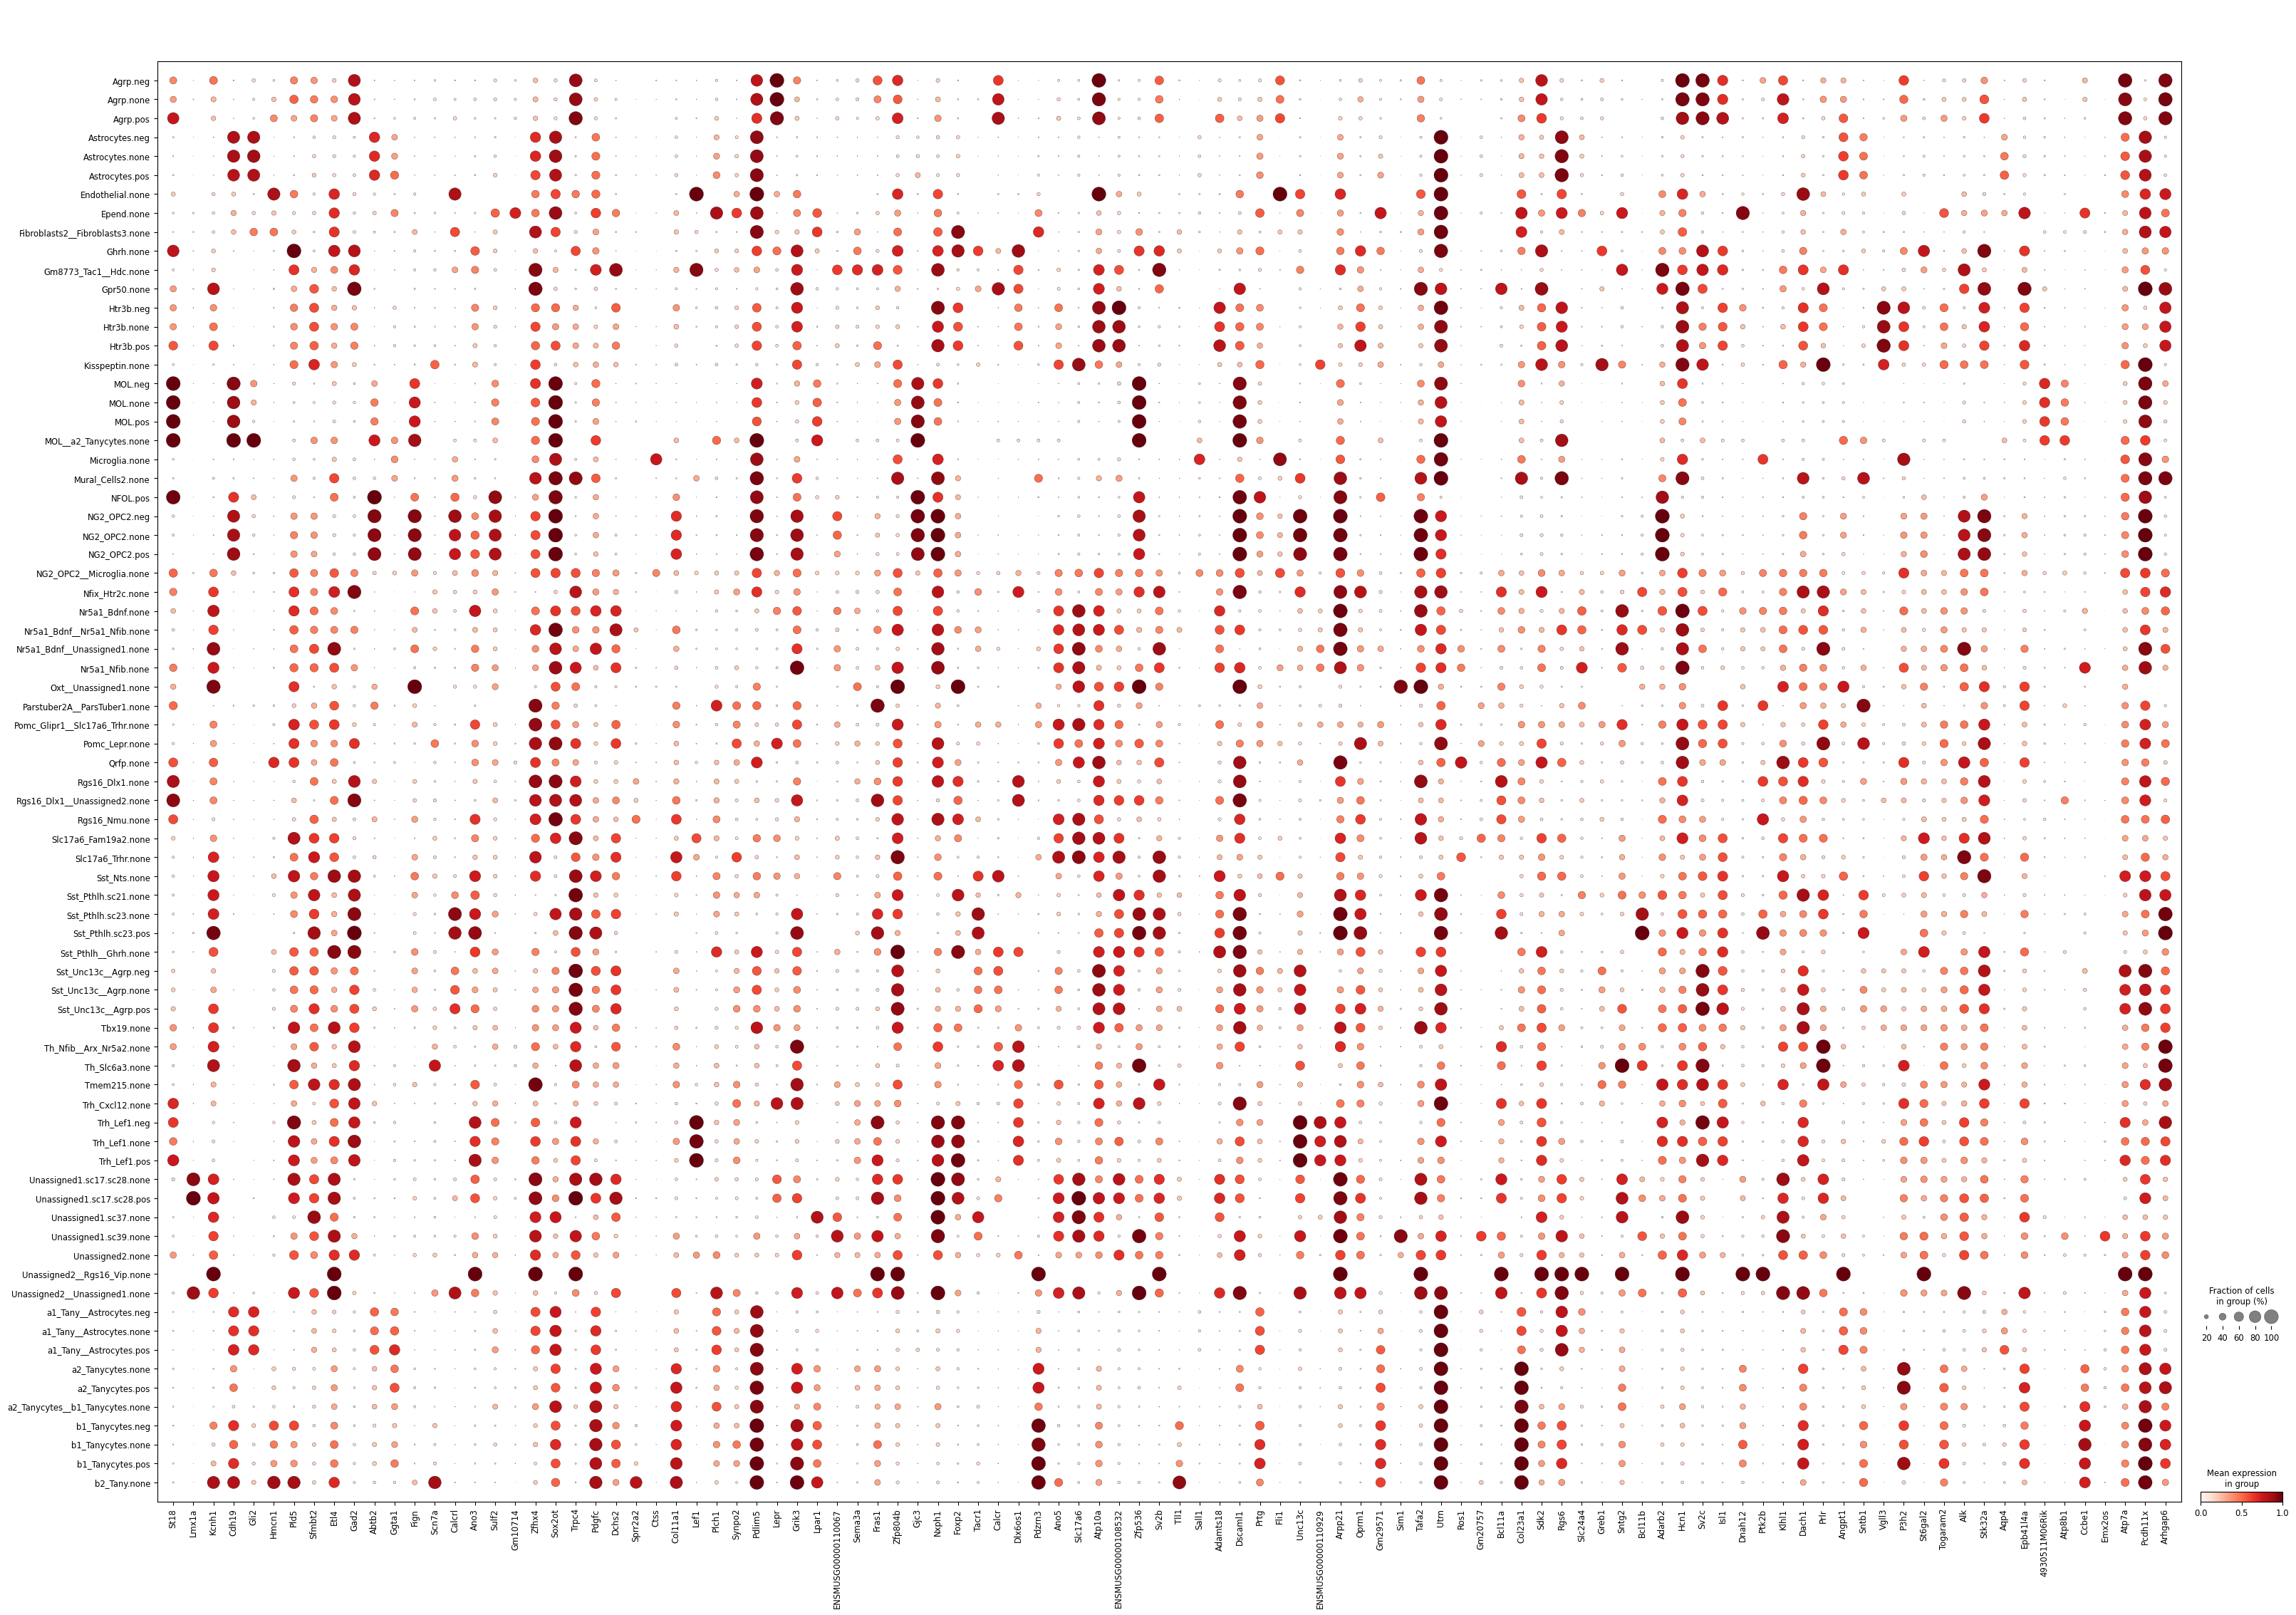

In [33]:
sc.pl.dotplot(adata,
              var_names=df[df['persist_set_100']].index.values,
              groupby='polar_label',
              layer='bin', )
plt.show()

In [34]:
df[df['persist_set_100']].index.values

array(['St18', 'Lmx1a', 'Kcnh1', 'Cdh19', 'Gli2', 'Hmcn1', 'Pld5',
       'Sfmbt2', 'Etl4', 'Gad2', 'Abtb2', 'Ggta1', 'Fign', 'Scn7a',
       'Calcrl', 'Ano3', 'Sulf2', 'Gm10714', 'Zfhx4', 'Sox2ot', 'Trpc4',
       'Pdgfc', 'Dchs2', 'Sprr2a2', 'Ctss', 'Col11a1', 'Lef1', 'Plch1',
       'Synpo2', 'Pdlim5', 'Lepr', 'Grik3', 'Lpar1', 'ENSMUSG00000110067',
       'Sema3a', 'Fras1', 'Zfp804b', 'Gjc3', 'Nxph1', 'Foxp2', 'Tacr1',
       'Calcr', 'Dlx6os1', 'Pdzrn3', 'Ano5', 'Slc17a6', 'Atp10a',
       'ENSMUSG00000108532', 'Zfp536', 'Sv2b', 'Tll1', 'Sall1',
       'Adamts18', 'Dscaml1', 'Prtg', 'Fli1', 'Unc13c',
       'ENSMUSG00000110929', 'Arpp21', 'Oprm1', 'Gm29571', 'Sim1',
       'Tafa2', 'Utrn', 'Ros1', 'Gm20757', 'Bcl11a', 'Col23a1', 'Sdk2',
       'Rgs6', 'Slc24a4', 'Greb1', 'Sntg2', 'Bcl11b', 'Adarb2', 'Hcn1',
       'Sv2c', 'Isl1', 'Dnah12', 'Ptk2b', 'Klhl1', 'Dach1', 'Prlr',
       'Angpt1', 'Sntb1', 'Vgll3', 'P3h2', 'St6gal2', 'Togaram2', 'Alk',
       'Stk32a', 'Aqp4', 'Epb41l4a'

In [38]:
gbr_100 = ['Nrg3', 'Plp1', 'Aqp4', 'Htr3b', 'Rax', 'Rbfox1', 'Il1rapl2', 'Robo1', 'Kcnip4', 'Sgcz', 'Fgf13', 'Cntn4', 'Egfem1', 'Gpc6', 'Hdac9', 'Col25a1', 'Dcc', 'Nkain2', 'Pcdh11x', 'Prkg1', 'Pdgfra', 'Prr16', 'Kctd16', 'Nrxn3', 'Pde10a', 'Plcl1', 'Nrg1', 'Rtl4', 'Bmp4', 'Grm7', 'Ptprk', 'Sgcd', 'Ncam2', 'Zfhx3', 'Erbb4', 'Kirrel3', 'Nxph1', 'Mgat4c', 'Oxr1', 'Sorcs1', 'Pcdh7', 'Adarb2', 'Csmd1', 'Inpp4b', 'Ptprt', 'Trpm3', 'Tenm3', 'Tox', 'Alcam', 'Car10', 'Ntm', 'Slit2', 'Plxdc2', 'Tenm2', 'Luzp2', 'Ptprd', 'Lrp1b', 'Sox5', 'Brinp3', 'Pcdh9', 'Cacna2d3', 'Rmst', 'Rgs6', 'Fat3', 'Cadm2', 'Pde4b', 'Gpc5', 'Cfap299', 'Gria1', 'Arhgap6', 'Pdzrn3', 'P3h2', 'Kcnq3', 'Plcb1', 'Deptor', 'Agrp', 'Pomc', 'Lef1', 'Lmx1a', 'Cntn5', 'Lingo2', 'Zfp804b', 'Galntl6', 'Grm8', 'Hs3st4', 'Fhit', 'Immp2l', 'Lrmda', 'Macrod2', 'Gtdc1', 'Naaladl2', 'Nalf1', 'Slc1a2', 'Ctnna2', 'Slc7a11', 'Prkca', 'Dlg2', 'Gabrg3']

In [39]:
len(gbr_100)

98

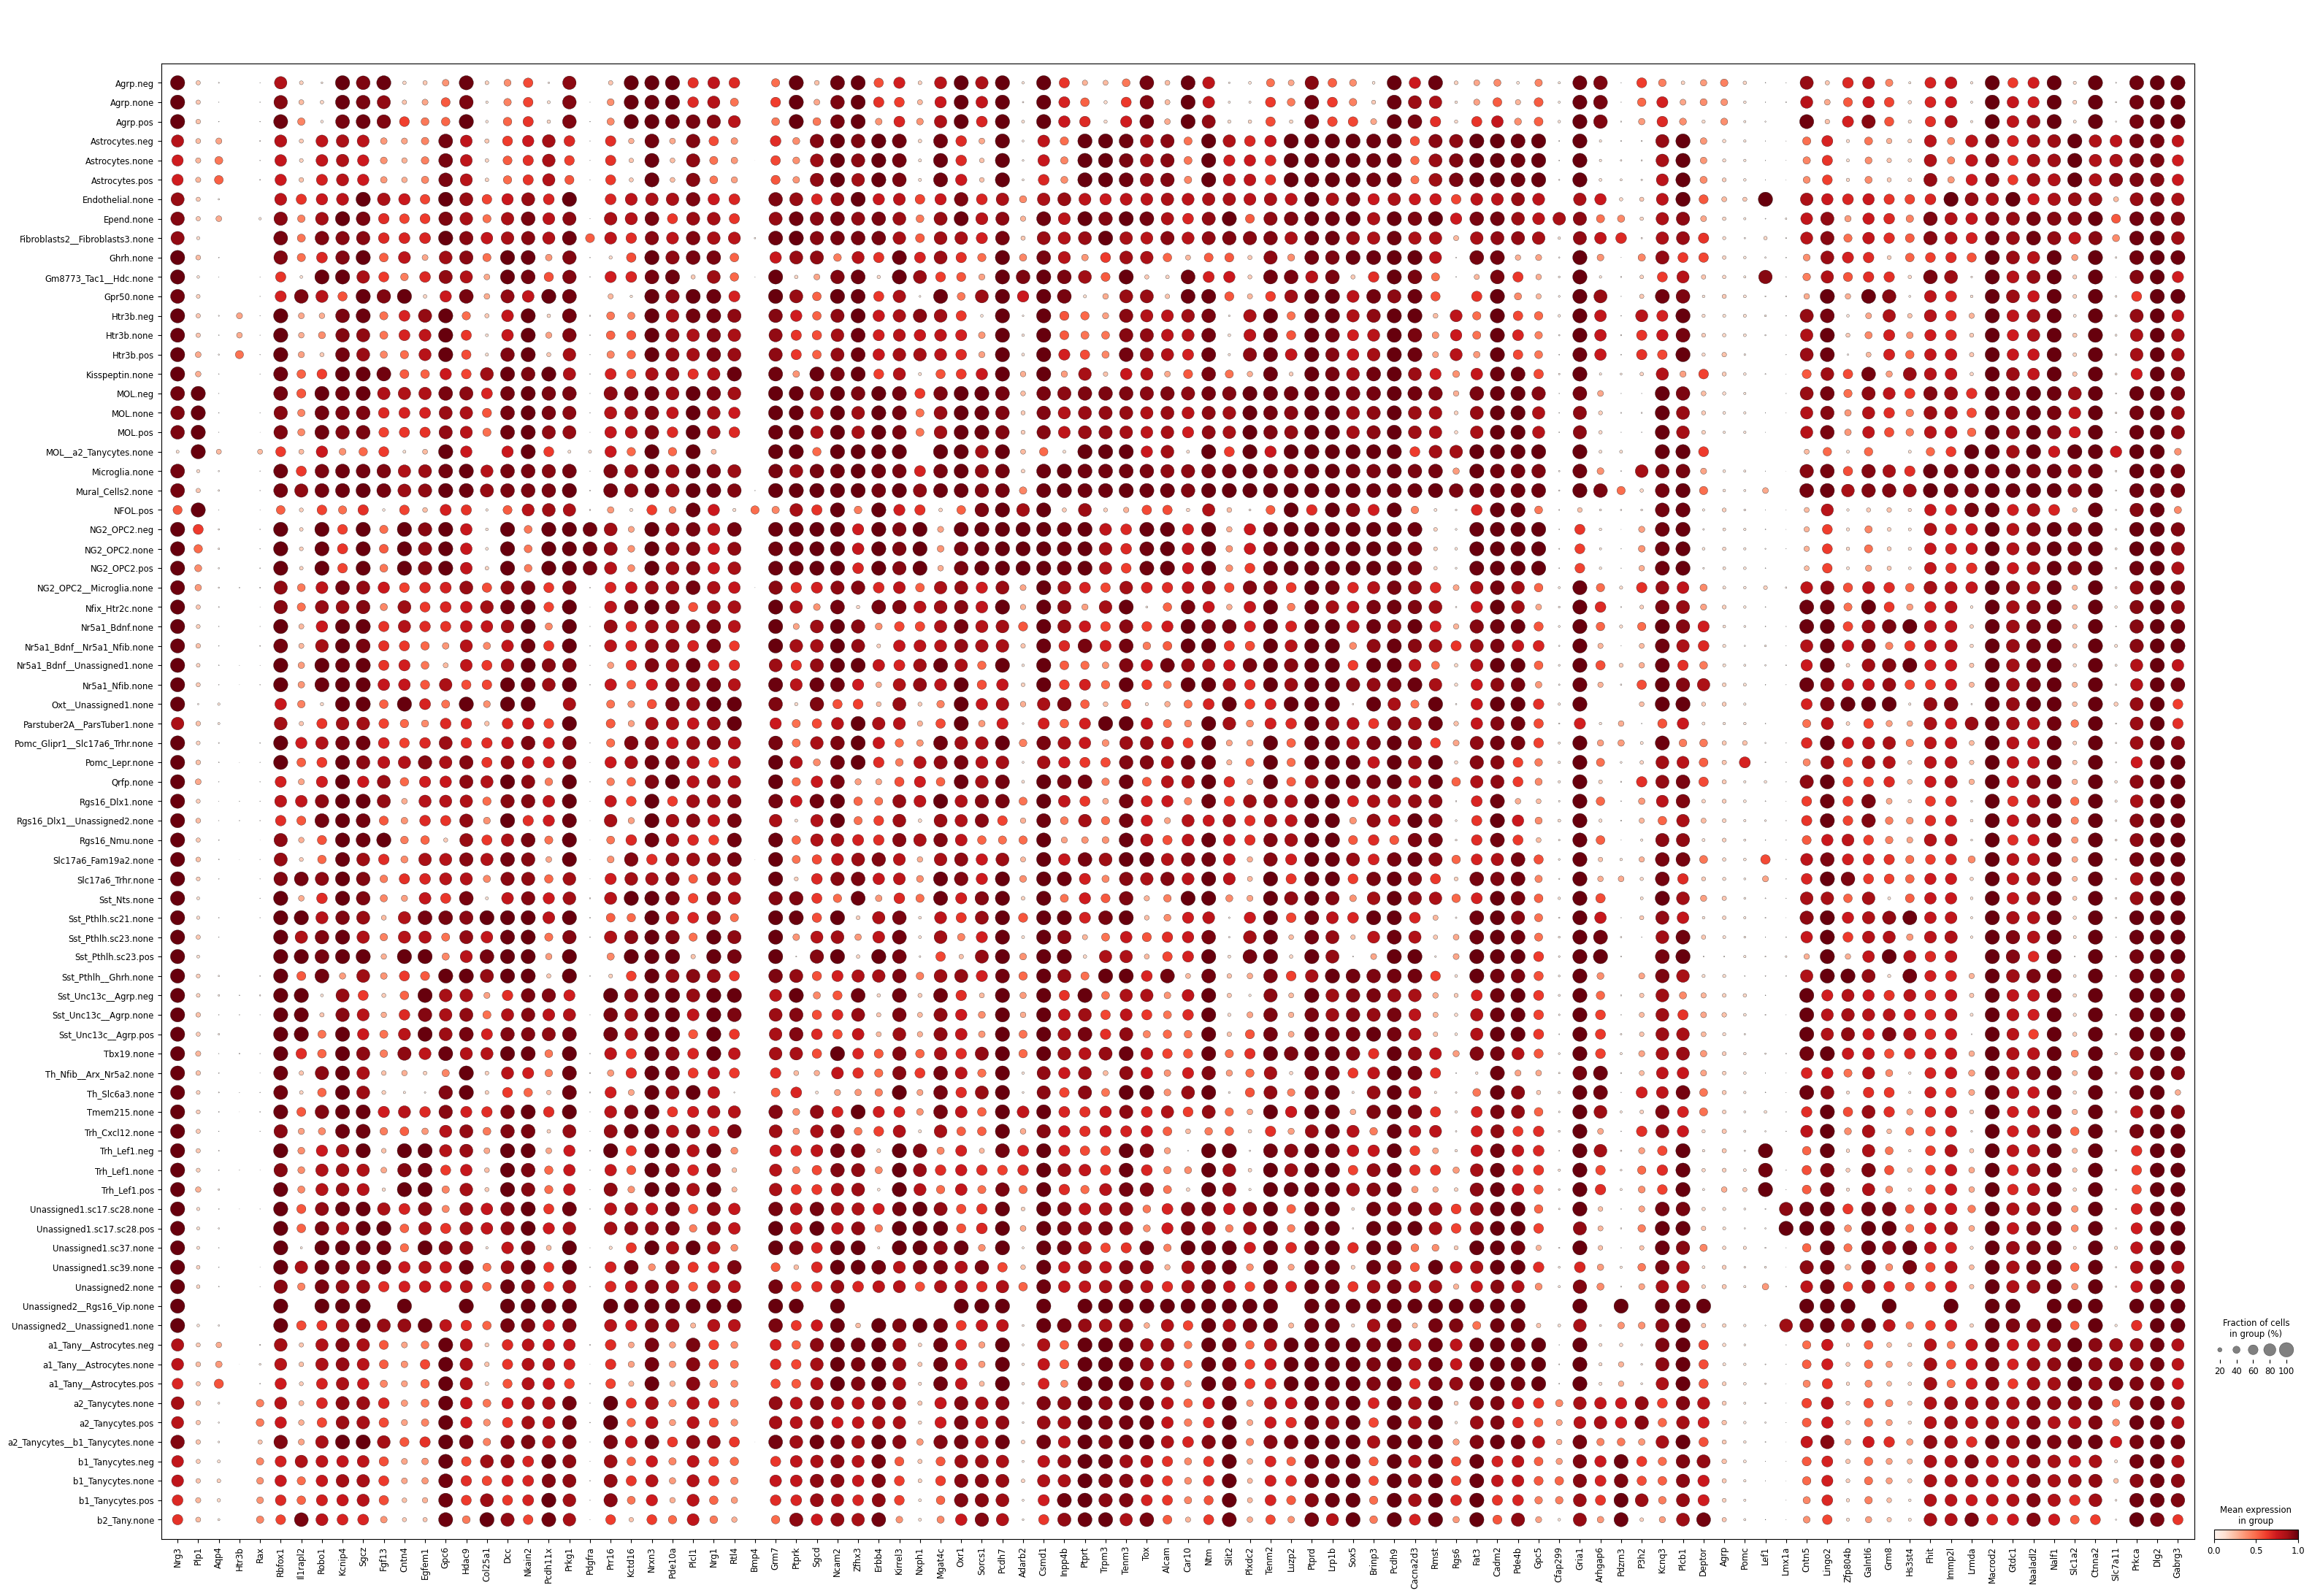

In [40]:
sc.pl.dotplot(adata,
              var_names=gbr_100,
              groupby='polar_label',
              layer='bin')
plt.show()

In [43]:
len(selector.candidates)

579

In [44]:
selector.loss_fn

CrossEntropyLoss()

In [45]:
selector.preselected

array([], dtype=int64)

In [46]:
selector.preselected_relative

array([], dtype=float64)

In [50]:
selector.activation

ReLU()

In [ ]:
selector.